### Test fitting

In [ ]:
import numpy as np
import mab_subjects
from banditpy.models.policy import StateInference2Arm
from banditpy.models import DecisionModel
from banditpy.models.optim import OptunaOptimizer

exps = mab_subjects.mostly_unstruc.allsess + mab_subjects.mostly_struc.allsess

for e, exp in enumerate(exps[:1]):

    task = exp.b2a.filter_by_trials(100, 100)
    task.auto_block_window_ids()
    policy = StateInference2Arm()
    model = DecisionModel(task=task, policy=policy, reset_mode="window")
    model.fit(optimizer=OptunaOptimizer(n_trials=30, timeout=300))

In [ ]:
from neuropy import plotting

fig = plotting.Fig(1, 2)

ax = fig.subplot(fig.gs[0])
ax.plot(task.get_optimal_choice_probability())
ax.plot(task_sim.get_optimal_choice_probability())

### Plotting parameters 

In [ ]:
import mab_subjects
import numpy as np
import pandas as pd
from neuropy import plotting
from mab_colors import Palette2Arm
from mab_model_utils import plot_param_block_grid

data_df = mab_subjects.GroupData().fit_si.latest

plot_param_block_grid(data_df=data_df, model_key="si")

### Compare actual vs simulated performance

In [ ]:
from mab_model_utils import build_actual_vs_sim_perf_df

exps = mab_subjects.mostly_unstruc.allsess + mab_subjects.mostly_struc.allsess
est_params_df = mab_subjects.GroupData().fit_si.latest

perf_df = build_actual_vs_sim_perf_df(exps, est_params_df)
mab_subjects.GroupData().save(perf_df, "fit_si_sim")

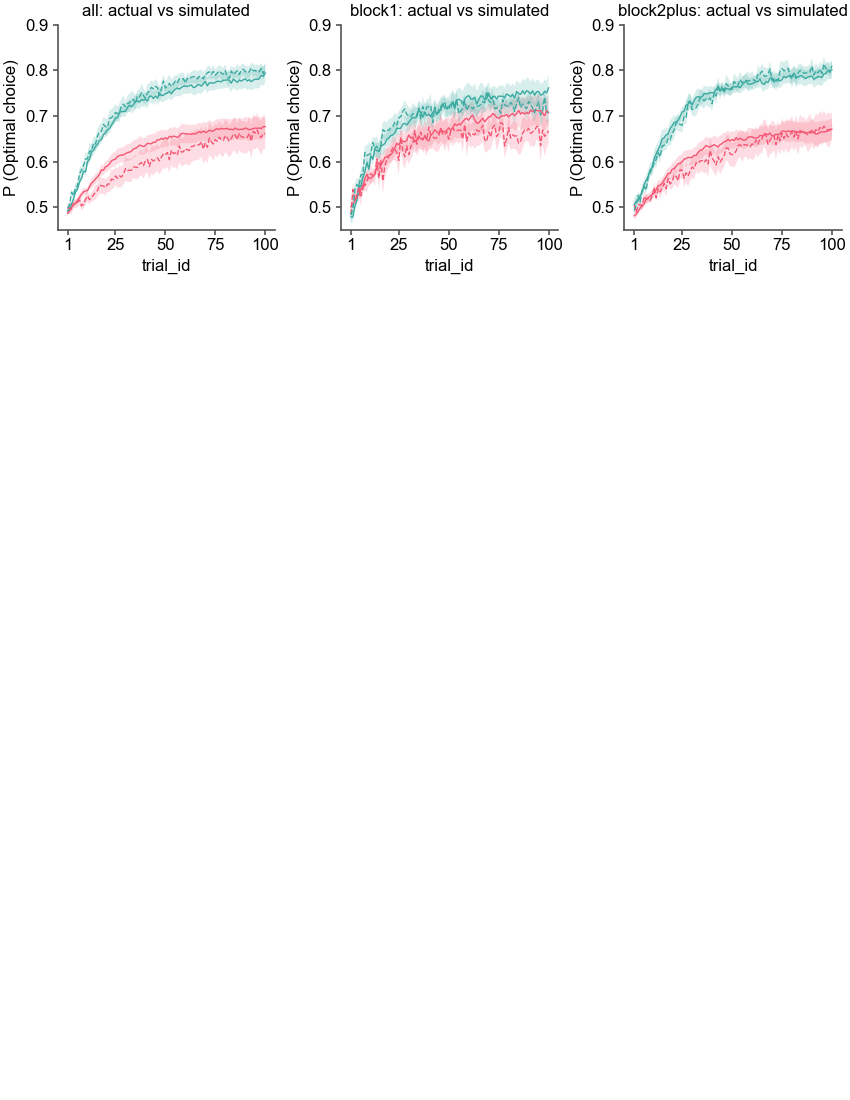

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from neuropy import plotting
import mab_subjects
from mab_colors import Palette2Arm
import numpy as np

fig = plotting.Fig(5, 3, size=(8.5, 11), fontsize=12)

df = mab_subjects.GroupData().fit_si_sim.latest

hue_order = ["unstruc", "struc"]
plot_kw = dict(
    data=df,
    x="trial_id",
    hue="grp",
    hue_order=hue_order,
    palette=Palette2Arm().as_dict(),
    linewidth=1,
    errorbar="se",
    err_kws=dict(edgecolor="none"),
)

for i, block in enumerate(["all", "block1", "block2plus"]):
    ax = fig.subplot(fig.gs[i])
    sns.lineplot(y=f"perf_{block}", ax=ax, linestyle="solid", **plot_kw)
    sns.lineplot(y=f"sim_perf_{block}", ax=ax, linestyle="dashed", **plot_kw)

    ax.set_title(f"{block}: actual vs simulated")
    ax.set_ylabel("P (Optimal choice)")
    ax.set_ylim(0.45, 0.9)
    ax.set_xticks([1, 25, 50, 75, 100])
    ax.get_legend().remove()
    # ax.legend(['a','b','c','d'])

    # ax.legend(["unstruc - actual", "struc - actual", "unstruc - sim", "struc - sim"])

### Comparing switching behavior between actual and simulated

In [ ]:
import mab_subjects
from mab_model_utils import build_actual_vs_sim_swp_df

exps = mab_subjects.mostly_unstruc.allsess + mab_subjects.mostly_struc.allsess
params_df = mab_subjects.GroupData().fit_si.latest

swp_df = build_actual_vs_sim_swp_df(exps, params_df)
mab_subjects.GroupData().save(swp_df, "switchprob_si")

In [ ]:
from neuropy import plotting
from statplotannot.plots import SeabornPlotter
import mab_subjects
from mab_colors import Palette2Arm


df = mab_subjects.GroupData().switchprob_si.latest

fig = plotting.Fig(7, 4, fontsize=10)

for i, block in enumerate(["all", "block1", "block2plus"]):

    ax1 = fig.subplot(fig.gs[i, 1])
    SeabornPlotter(
        data=df,
        x="trial_id",
        y=f"switch_prob_{block}",
        hue="grp",
        hue_order=["unstruc", "struc"],
        palette=Palette2Arm().as_dict(),
        err_kws=dict(edgecolor="none"),
        ax=ax1,
    ).lineplot(linestyle="solid", palette=Palette2Arm().as_dict(), errorbar="se")
    ax1.set_ylim(0.0, 0.23)

    ax2 = fig.subplot(fig.gs[i, 2])
    SeabornPlotter(
        data=df,
        x="trial_id",
        y=f"sim_switch_prob_{block}",
        hue="grp",
        hue_order=["unstruc", "struc"],
        palette=Palette2Arm().as_dict(),
        err_kws=dict(edgecolor="none"),
        ax=ax2,
    ).lineplot(linestyle="solid", palette=Palette2Arm().as_dict(), errorbar="se")
    ax2.set_ylim(0.1, 0.5)

    for ax in [ax1, ax2]:
        ax.set_ylabel("Switch Probability")
        # ax.set_ylim(0.0, 0.5)
        ax.set_xticks([1, 25, 50, 75, 100])
        ax.set_title(f"{block}")
        ax.legend_.remove()

fig.fig.suptitle(
    "Actual (left) vs SI-Simulated (right) Switch Probability", fontsize=14
)